In [47]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
from nwb_pipeline.csc_reader import load_mat_file
from sleep_score.analysis import (
    downsample_sleep_score, plot_sleep_stages, plot_two_sleep_stages, plot_contingency_matrix, load_sleep_score,
    plot_ripple_rate_by_sleep_state, plot_activation_by_ripple
)

# spindle_file = ('/Users/XinNiuAdmin/HoffmanMount/data/PIPELINE_vc/ANALYSIS/MovieParadigm/566_MovieParadigm'
#                 '/Experiment-8/Spindles/spindles_RMH2.mat')
# sleep_score_rockelle = ('/Users/XinNiuAdmin/Library/CloudStorage/Box-Box/Vwani_Movie/sleep scoring/'
#                         'EXP8_Movie24&566_firstpass.csv')
# sleep_score_file = ('/Users/XinNiuAdmin/HoffmanMount/data/PIPELINE_vc/ANALYSIS/MovieParadigm/'
#                     '566_MovieParadigm/Experiment-8/sleep_score/sleepScore_ROF2_001.mat')

# spindle_file = ('/Users/XinNiuAdmin/HoffmanMount/data/PIPELINE_vc/ANALYSIS/MovieParadigm/562_MovieParadigm'
#                 '/Experiment-6/Spindles/spindles_LAH5.mat')
# sleep_score_rockelle = ('/Users/XinNiuAdmin/Library/CloudStorage/Box-Box/Vwani_Movie/sleep scoring/'
#                         'EXP6_Movie24&562_firstpass.csv')
# sleep_score_file = ('/Users/XinNiuAdmin/HoffmanMount/data/PIPELINE_vc/ANALYSIS/MovieParadigm/'
#                     '562_MovieParadigm/Experiment-6/sleep_score/sleepScore_LOFAC5_001.mat')

spindle_file = ('/Users/XinNiuAdmin/HoffmanMount/data/PIPELINE_vc/ANALYSIS/MovieParadigm/561_MovieParadigm'
                '/Experiment-4/Spindles/spindles_LMH4.mat')
sleep_score_rockelle = ('/Users/XinNiuAdmin/Library/CloudStorage/Box-Box/Vwani_Movie/sleep scoring/'
                        'EXP4_Movie24&561_firstpass.csv')
sleep_score_file = ('/Users/XinNiuAdmin/HoffmanMount/data/PIPELINE_vc/ANALYSIS/MovieParadigm/'
                    '561_MovieParadigm/Experiment-4/sleep_score/sleepScore_LAC4_001.mat')


spindle_fs = 2000  # Hz

data = load_mat_file(spindle_file)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
start_time = np.array([x[0] for x in data['spindlesStartEndTimes']])
end_time = np.array([x[1] for x in data['spindlesStartEndTimes']])
start_time.shape

(655,)

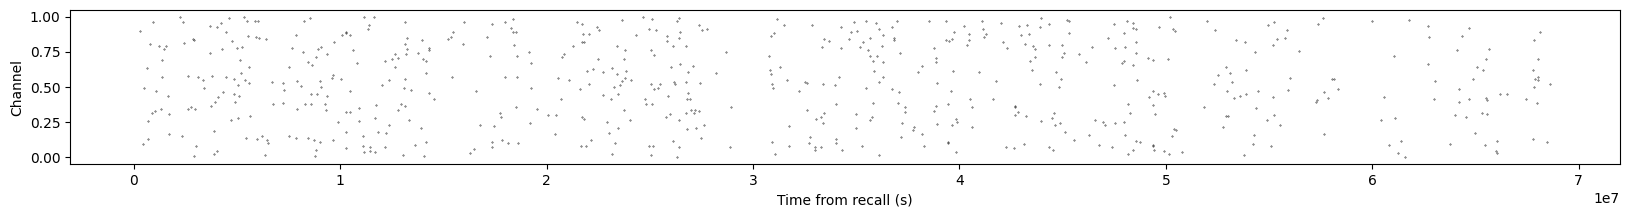

In [49]:

# plot raster
plt.subplots(1,1,figsize=(20,2))   
plt.scatter(start_time, np.random.rand(len(start_time)), s=.1, color='k') # SWR time v. trial
plt.xlabel('Time from recall (s)')
plt.ylabel('Channel')
ax = plt.gca()


In [50]:
len(start_time)/max(start_time)/spindle_fs

np.float64(4.774647917098116e-09)

In [51]:

sleep_score_rockelle = load_sleep_score(sleep_score_rockelle)
sleep_score_rockelle = downsample_sleep_score(sleep_score_rockelle, 1/30, 300)

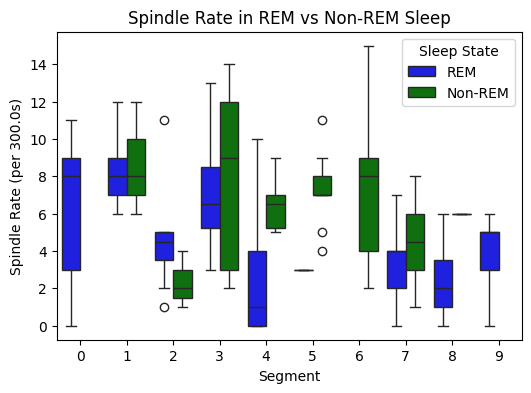

In [52]:
plot_ripple_rate_by_sleep_state(
    start_time, sleep_score_rockelle, 
    sampling_rate=spindle_fs, sleep_score_sr=1/300, 
    segment_duration=1, event_name="Spindle Rate",
)

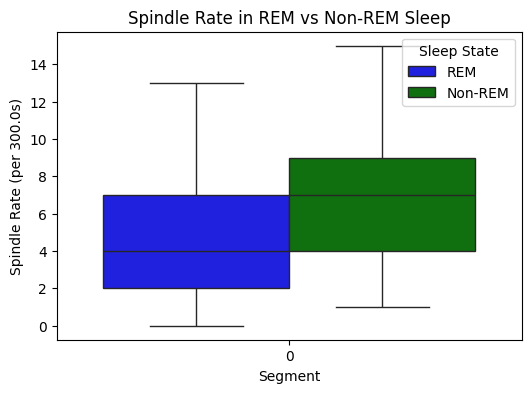

In [53]:
plot_ripple_rate_by_sleep_state(
    start_time, sleep_score_rockelle, 
    sampling_rate=spindle_fs, sleep_score_sr=1/300, 
    segment_duration=10, event_name="Spindle Rate"
)

/opt/miniconda3/envs/ripple-detection/lib/python3.10/site-packages/nwb_pipeline/csc_reader.py:303: UserWarning: /Users/XinNiuAdmin/HoffmanMount/data/PIPELINE_vc/ANALYSIS/MovieParadigm/561_MovieParadigm/Experiment-4/sleep_score/sleepScore_LAC4_001.mat is not in MATLAB 7.3 format, loading with scipy.io.loadmat
  warnings.warn(f"{filename} is not in MATLAB 7.3 format, loading with scipy.io.loadmat")


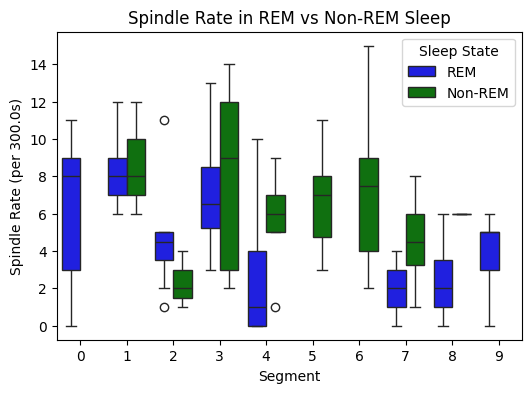

In [54]:


data = load_mat_file(sleep_score_file)
sleep_score_binsize = 300
sleep_score_maya = downsample_sleep_score(data['sleep_score_vec'], original_sr=2000, bin_size=sleep_score_binsize)

plot_ripple_rate_by_sleep_state(
    start_time, sleep_score_maya, 
    sampling_rate=spindle_fs, sleep_score_sr=1/sleep_score_binsize, 
    segment_duration=1, event_name="Spindle Rate",
)

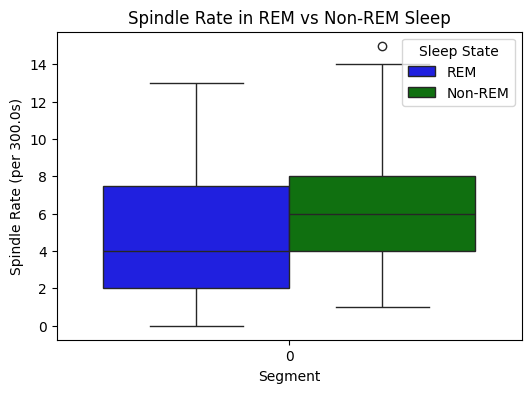

In [55]:
plot_ripple_rate_by_sleep_state(
    start_time, sleep_score_maya, 
    sampling_rate=spindle_fs, sleep_score_sr=1/sleep_score_binsize, 
    segment_duration=10, event_name="Spindle Rate",
)

In [56]:


activation_file = ('/Users/XinNiuAdmin/Documents/brain_decoding/results/movie_24_merged/'
                   '566_None_multi-vit_test_optimalX_CARX_2024-11-13_16-02-47/memory/prediction/epoch40_test_sleep_1_results.npy')

activation_fs = 4
activation_data = np.load(activation_file)
activation_jack=activation_data[:, 4]
activation_jack

array([0.05080072, 0.00444514, 0.00187394, ..., 0.00022834, 0.00042289,
       0.21594137])

In [57]:
len(activation_jack) / 4 / 3600

8.82048611111111

(127015,)


/Users/XinNiuAdmin/Documents/ripple-detection/src/sleep_score/analysis.py:318: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].spines['right'].set_visible(False)


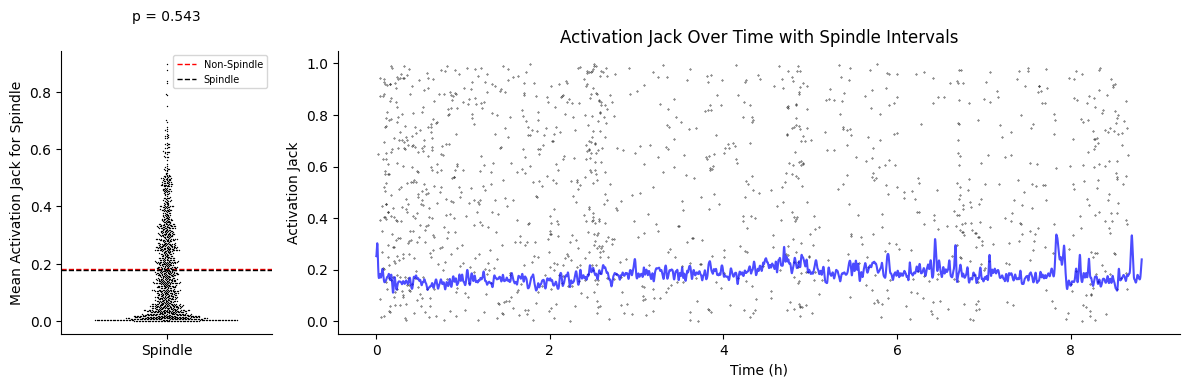

In [17]:
plot_activation_by_ripple(
    activation_jack, start_time, end_time,
    activation_fs=4, ripple_fs=spindle_fs, 
    activation_label="Activation Jack",
    event_label="Spindle",
)